# SUPPORT VECTOR MACHINE (Classification)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

### Importing dataset

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')

### Data Preperation 

Let's drop the non-relevant unnamed columns 

In [3]:

df=df.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'],axis=1)



In [4]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Rename Columns to have an easier time to distiguish each of them

In [5]:
df=df.rename(columns={"v1":"Category","v2":"Text"})
df.head()

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Check For null values

In [6]:
df.isnull().sum()

Category    0
Text        0
dtype: int64

### Comparison between spam and not

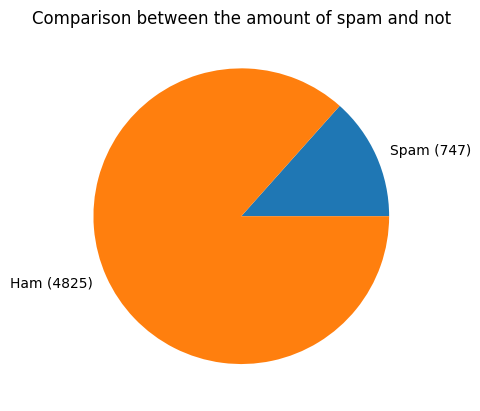

In [7]:
amount_of_spam = len(df[df["Category"] == "spam"])
amount_of_ham = len(df[df["Category"] == "ham"])

fig, ax = plt.subplots()


spam_label = "Spam ({})".format(amount_of_spam)
ham_label = "Ham ({})".format(amount_of_ham)

ax.pie([amount_of_spam, amount_of_ham], labels=[spam_label, ham_label])

plt.title("Comparison between the amount of spam and not")
plt.show()

### Feature Engineering

Encode labels (Category)

In [8]:
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])  # 1 for spam, 0 for ham

Convert text to TF-IDF features

In [9]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
x = tfidf_vectorizer.fit_transform(df['Text'])


Labels

In [10]:
y = df['Category']


Check shape of feature matrix and labels

In [11]:
print(x.shape)
print(y.shape)

(5572, 8404)
(5572,)


### Modelling

Split the dataset into training and testing sets

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

The data is divided into testing (X_test, y_test) and training (X_train, y_train) sets. Twenty percent of the data will be used for testing, according to the setting test_size=0.2. By employing a fixed seed for randomization throughout the split, random_state=42 guarantees reproducibility.

### Initialize and train the SVM model

In [13]:
model = SVC()
model.fit(x_train, y_train)

SVC()

### Evaluating the Model

In [14]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['ham', 'spam'])

print("Accuracy:", accuracy)


Accuracy: 0.9721973094170404


Accuracy: The overall accuracy of the model is approximately 97.22%.

In [15]:
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       0.99      0.80      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



### Analysis
**Precision**: Precision is the ratio of correctly predicted positive observations to the total predicted positives. For the ham class, the precision is 0.97, indicating that out of all instances predicted as ham, 97% were correctly classified. For the spam class, the precision is 0.99, meaning that out of all instances predicted as spam, 99% were correctly classified.

**Recall**: Recall, also known as sensitivity or true positive rate, is the ratio of correctly predicted positive observations to all actual positives. For the ham class, the recall is 1.00, indicating that the model correctly identified 100% of all actual instances of ham. For the spam class, the recall is 0.80, meaning that the model only captured 80% of all actual instances of spam.

**F1-score**: F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For the ham class, the F1-score is 0.98, and for the spam class, it is 0.89.

**Support**: Support is the number of actual occurrences of the class in the specified dataset. For the ham class, the support is 965, and for the spam class, it is 150.

**Accuracy**: Overall accuracy of the model is 0.97, meaning that the model correctly predicted the class label for 97% of the instances in the test set.

### Generate confusion matrix

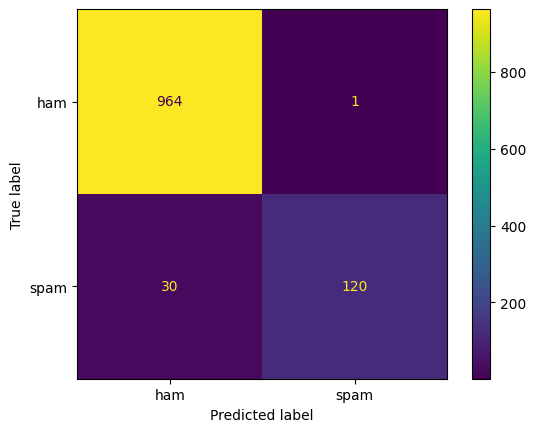

In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot()
plt.show()

**True Positives (TP)**: The number of spam messages correctly predicted as spam.

    120 (bottom-right cell)
**True Negatives (TN)**: The number of ham messages correctly predicted as ham.

    964 (top-left cell)
**False Positives (FP)**: The number of ham messages incorrectly predicted as spam.

    1 (top-right cell)
**False Negatives (FN)**: The number of spam messages incorrectly predicted as ham.

    30 (bottom-left cell)

## ROC CURVE

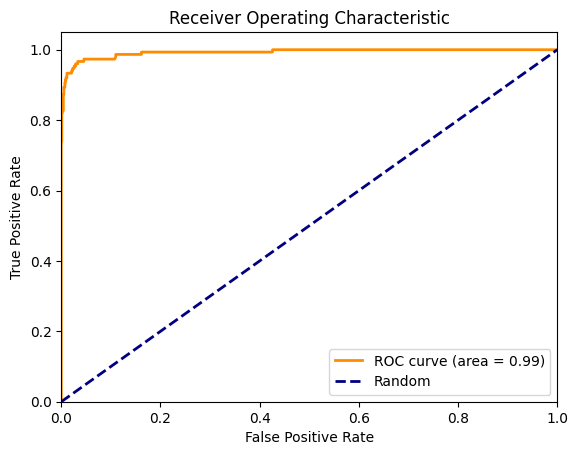

In [17]:
y_scores = model.decision_function(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Analysis
**ROC Curve (Orange Line)**: This curve represents the performance of the model. The closer the curve is to the top-left corner (0, 1), the better the model's performance. In this case, the ROC curve is very close to the top-left corner, indicating excellent performance.

**Area Under the Curve (AUC)**: The AUC value of 0.99 indicates the degree of separability between the two classes. An AUC of 0.5 represents a random classifier, while a value of 1.0 represents a perfect classifier. In this case, the AUC of 0.99 suggests that the model's performance is very close to that of a perfect classifier.

**Random Classifier (Dashed Line)**: The dashed diagonal line represents the performance of a random classifier, where the True Positive Rate is equal to the False Positive Rate for all thresholds. The orange ROC curve being well above this line indicates that the model is significantly better than random guessing.

**Accuracy**: The previously stated accuracy of 97.22% (or approximately 97.2%) indicates the overall correctness of the model's predictions on the test dataset.

The ROC curve and the AUC value of 0.99 demonstrate that the SVM model is highly effective in distinguishing between spam and ham messages. The high TPR and low FPR across various thresholds indicate that the model maintains excellent performance with minimal misclassifications. This reinforces the findings from the confusion matrix and other metrics, confirming the robustness and accuracy of the model.